# Extractor de señales

Se cargan tres librerías básicas
- **os**, para el manejo de los archivos entre carpetas, camnbios en las rutas etc...
- **numpy** y **sicpy**, para las funciones internas que se necesiten. Scipy en cuestión es para poder manejar achivos .mat.

In [7]:
import os
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

Se establece un extractor del parámetro 'signal' de las señales eléctricas extraidas desde la base de datos. 'Signal' hace referencia a la Base de datos que estamos usando.

In [8]:
def extraer_vector(ruta_archivo):
    data = scipy.io.loadmat(ruta_archivo)
    signal = data['signal']
    return signal.flatten()

Se ha descargado una hora revisada sin PQDs
Se han generado iteraciones para hacer un barrido.

- Minuto (0-59 s)
- Segundo (0-59 s)
- Decimal (0-9 s)

Se tiene en cuenta el decimal porque dependiendo de la hora es posible que haya una variación de ese valor, dando un error en la búsqueda.

In [9]:
def buscar_archivo(year, mes, dia, hora):
    # Directorio fijo desde la raíz del proyecto
    directorio_base = os.path.abspath(os.path.join(os.getcwd(), 'raw_signals'))
    archivos_encontrados = []

    for minuto in range(60):
        for segundo in range(60):
            for fraccion in range(10):
                nombre_archivo = f"{year}_{mes}_{dia}_{hora}_{minuto}_{segundo}.{fraccion}_lab_politecnica_3a.mat"
                ruta_archivo = os.path.join(directorio_base, nombre_archivo)
                if os.path.exists(ruta_archivo):
                    archivos_encontrados.append(ruta_archivo)

    return archivos_encontrados

En la siguiente parte del código se guardan los nuevos archivos de python que se van creando.
He añadido unas líneas que cree una carpeta en el caso de no encontrar la carpeta.
Como flag, hago un print con el output esperado.

In [10]:
def guardar_vector(vector, contador):
    directorio_destino = os.path.join(os.getcwd(), 'original_signal')
    os.makedirs(directorio_destino, exist_ok=True)
    nombre_archivo = f"or_s_{contador}.npy"
    ruta_archivo_nuevo = os.path.join(directorio_destino, nombre_archivo)
    np.save(ruta_archivo_nuevo, vector)
    print(f"Vector extraído y guardado en {nombre_archivo}")

Con la iteración del programa anterior, se escribe un código que pida de manera manual la fecha.
En el caso del ejemplo del que estoy trabajando, en los inputs habrá que añadir:
- 2023
- 6
- 1
- 0

El minuto, segundo y decimal se iterará.

In [11]:
def obtener_fecha():
    # Tal cual del programa principal, 0 cambios.
    year = input("Ingrese el año: ")
    mes = input("Ingrese el mes: ")
    dia = input("Ingrese el día: ")
    hora = input("Ingrese la hora: ")

    # Dar los datos que tengamos seguro.
    archivos = buscar_archivo(year, mes, dia, hora)

    # Creacion del nuevo .npy
    contador = 1
    for ruta_archivo in archivos:
        vector = extraer_vector(ruta_archivo)
        guardar_vector(vector, contador)
        contador += 1

    # Mostrar mensaje si no se encontraron archivos
    if not archivos:
        print(f"No se encontraron archivos para la fecha proporcionada.")

    # flag para mi, por si va mal la iteración.
    print("Se termina de buscar")


# Llamada a la función principal
if __name__ == "__main__":
    obtener_fecha()

Vector extraído y guardado en or_s_1.npy
Vector extraído y guardado en or_s_2.npy
Vector extraído y guardado en or_s_3.npy
Vector extraído y guardado en or_s_4.npy
Vector extraído y guardado en or_s_5.npy
Vector extraído y guardado en or_s_6.npy
Vector extraído y guardado en or_s_7.npy
Vector extraído y guardado en or_s_8.npy
Vector extraído y guardado en or_s_9.npy
Vector extraído y guardado en or_s_10.npy
Vector extraído y guardado en or_s_11.npy
Vector extraído y guardado en or_s_12.npy
Vector extraído y guardado en or_s_13.npy
Vector extraído y guardado en or_s_14.npy
Vector extraído y guardado en or_s_15.npy
Vector extraído y guardado en or_s_16.npy
Vector extraído y guardado en or_s_17.npy
Vector extraído y guardado en or_s_18.npy
Vector extraído y guardado en or_s_19.npy
Vector extraído y guardado en or_s_20.npy
Vector extraído y guardado en or_s_21.npy
Vector extraído y guardado en or_s_22.npy
Vector extraído y guardado en or_s_23.npy
Vector extraído y guardado en or_s_24.npy
V

Para comprobar que se está generando bien, se hace una representación de la señal creada para ver si está bien.

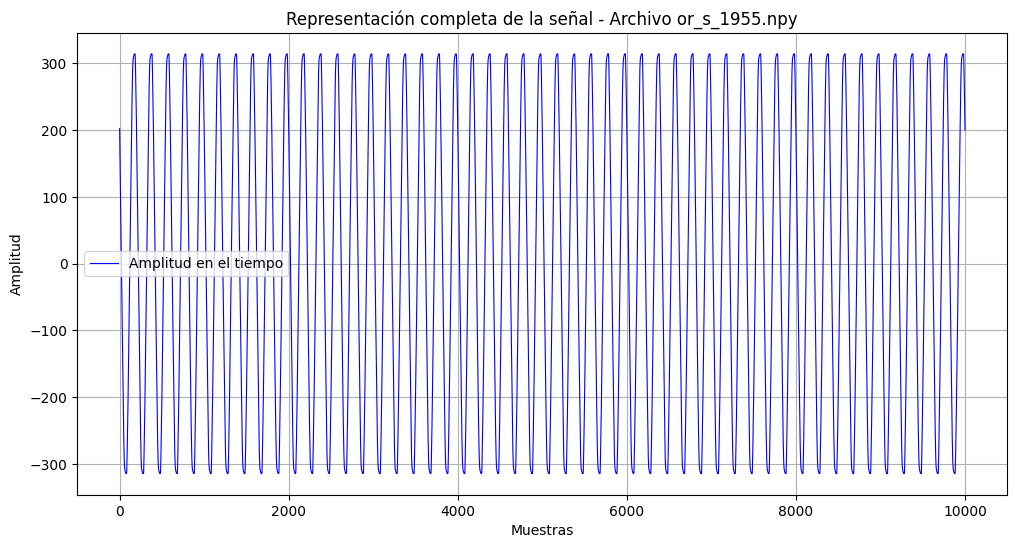

In [12]:
# Generar un número aleatorio entre 1 y 3600 para seleccionar el archivo
import random

archivo_numero = random.randint(1, 3600)
archivo_path = os.path.join(os.getcwd(), 'original_signal', f'or_s_{archivo_numero}.npy')

# Cargar el archivo completo
signal_data = np.load(archivo_path)

# Graficar todos los datos de la señal
plt.figure(figsize=(12, 6))
plt.plot(signal_data, color='b', linestyle='-', linewidth=0.8, label='Amplitud en el tiempo')
plt.title(f"Representación completa de la señal - Archivo or_s_{archivo_numero}.npy")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()